In [847]:
import numpy as np # Import numpy for data preprocessing
import pandas as pd # Import pandas for data frame read
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Import seaborn for data visualisation
import plotly.express as px # Import plotly for data visualisation
from sklearn.model_selection import train_test_split # Import train_test_split for data split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree # Import export_graphviz for visualizing Decision Trees

## Data read

In [848]:
df = pd.read_csv("data/diabetes.csv") # Data read

In [849]:
df.head() # print data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [850]:
df.isna().sum() # check for null value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [851]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [852]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

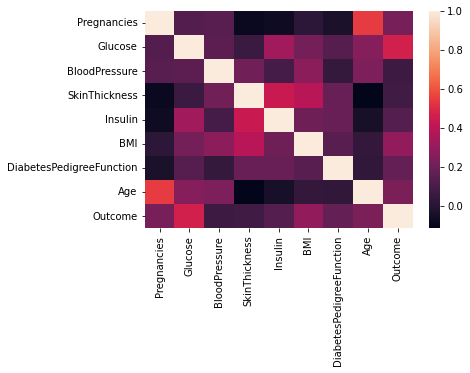

In [853]:
sns.heatmap(df.corr())

# Data split

In [854]:
X = df.iloc[:,0:-1] # All features
Y = df.iloc[:,-1] # Target

In [855]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [856]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [857]:
# Data split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size= 0.5)

In [858]:
print("Original data size : ", X.shape, Y.shape)
print("Train data size : ", x_train.shape, y_train.shape)
# print("Dev data size : ", x_dev.shape, y_dev.shape)
print("Test data size : ", x_test.shape, y_test.shape)

Original data size :  (768, 8) (768,)
Train data size :  (614, 8) (614,)
Test data size :  (154, 8) (154,)


# Decision Tree

In [859]:
accuracy = {}

### criterion="gini", splitter="best"

In [860]:
# Define and build model
clf = DecisionTreeClassifier(criterion="gini", splitter="best")
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [861]:
print(y_pred)

[0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0]


In [862]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [863]:
accuracy["dt_gini_best"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6688311688311688


In [864]:
print(metrics.confusion_matrix(y_test, y_pred))

[[73 26]
 [25 30]]


In [865]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        99
           1       0.54      0.55      0.54        55

    accuracy                           0.67       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.67      0.67       154



### criterion="gini", splitter="best", max_depth=8

In [866]:
# Define and build model
clf = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=8)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [867]:
print(y_pred)

[0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [868]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [869]:
accuracy["dt_gini_best_8"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


In [870]:
print(metrics.confusion_matrix(y_test, y_pred))

[[79 20]
 [26 29]]


In [871]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.59      0.53      0.56        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154



### criterion="entropy", splitter="best"

In [872]:
# Define and build model
clf = DecisionTreeClassifier(criterion="entropy", splitter="best")
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [873]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 1 0 1 0 1]


In [874]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [875]:
accuracy["dt_entropy_best"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


In [876]:
print(metrics.confusion_matrix(y_test, y_pred))

[[73 26]
 [22 33]]


In [877]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        99
           1       0.56      0.60      0.58        55

    accuracy                           0.69       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



### criterion="entropy", splitter="best", max_depth=8

In [878]:
# Define and build model
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=8)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [879]:
print(y_pred)

[1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 1 0 1 0 1]


In [880]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [881]:
accuracy["dt_entropy_best_8"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7077922077922078


In [882]:
print(metrics.confusion_matrix(y_test, y_pred))

[[78 21]
 [24 31]]


In [883]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        99
           1       0.60      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154



### criterion="entropy", splitter="random"

In [884]:
# Define and build model
clf = DecisionTreeClassifier(criterion="entropy", splitter="random")
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [885]:
print(y_pred)

[0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0
 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 1 0]


In [886]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [887]:
accuracy["dt_entropy_random"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


In [888]:
print(metrics.confusion_matrix(y_test, y_pred))

[[79 20]
 [22 33]]


In [889]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        99
           1       0.62      0.60      0.61        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



### criterion="entropy", splitter="random", max_depth=8

In [890]:
# Define and build model
clf = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=8)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [891]:
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0
 1 0 0 1 1 0]


In [892]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [893]:
accuracy["dt_entropy_random_8"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7597402597402597


In [894]:
print(metrics.confusion_matrix(y_test, y_pred))

[[82 17]
 [20 35]]


In [895]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



### criterion="entropy", splitter="best", max_depth=3

In [896]:
# Define and build model
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [897]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [898]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [899]:
accuracy["dt_entropy_best_3"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


In [900]:
print(metrics.confusion_matrix(y_test, y_pred))

[[88 11]
 [20 35]]


In [901]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



No handles with labels found to put in legend.


Glucose                     0.625810
BMI                         0.266582
Age                         0.107608
Pregnancies                 0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64


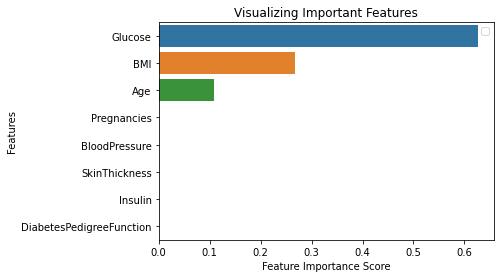

In [902]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### criterion="entropy", splitter="random", max_depth=3

In [903]:
# Define and build model
clf = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [904]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [905]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [906]:
accuracy["dt_entropy_random_3"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


In [907]:
print(metrics.confusion_matrix(y_test, y_pred))

[[90  9]
 [29 26]]


In [908]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        99
           1       0.74      0.47      0.58        55

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154



# Accuracy visulization of Decision Tree

In [909]:
accuracy_df_dt = pd.DataFrame(list(zip(accuracy.keys(), accuracy.values())), columns =['Arguments', 'Accuracy'])
accuracy_df_dt

,Arguments,Accuracy
0,dt_gini_best,0.668831
1,dt_gini_best_8,0.701299
2,dt_entropy_best,0.688312
3,dt_entropy_best_8,0.707792
4,dt_entropy_random,0.727273
5,dt_entropy_random_8,0.759740
6,dt_entropy_best_3,0.798701
7,dt_entropy_random_3,0.753247


In [910]:
fig = px.bar(accuracy_df_dt, x='Arguments', y='Accuracy')
fig.show()

# Random Forest

In [911]:
accuracy_rf = {}

### n_estimators = 1000, criterion='entropy'

In [912]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, criterion='entropy')
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [913]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0]


In [914]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [915]:
accuracy_rf["rf_entropy_1000"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8116883116883117


In [916]:
print(metrics.confusion_matrix(y_test, y_pred))

[[87 12]
 [17 38]]


In [917]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        99
           1       0.76      0.69      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



No handles with labels found to put in legend.


Glucose                     0.239366
BMI                         0.168944
Age                         0.133525
DiabetesPedigreeFunction    0.129219
BloodPressure               0.094144
Pregnancies                 0.086049
Insulin                     0.076514
SkinThickness               0.072238
dtype: float64


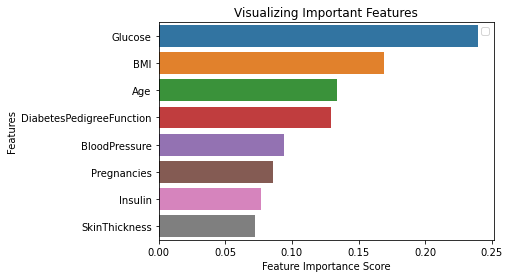

In [918]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### n_estimators = 100, criterion='entropy'

In [919]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, criterion='entropy')
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [920]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0]


In [921]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [922]:
accuracy_rf["rf_entropy_100"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


In [923]:
print(metrics.confusion_matrix(y_test, y_pred))

[[85 14]
 [16 39]]


In [924]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        99
           1       0.74      0.71      0.72        55

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.79       154
weighted avg       0.80      0.81      0.80       154



### n_estimators = 1000, random_state = 42, criterion='entropy'

In [925]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, criterion='entropy')
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [926]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0]


In [927]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [928]:
accuracy_rf["rf_entropy_1000_42"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


In [929]:
print(metrics.confusion_matrix(y_test, y_pred))

[[87 12]
 [18 37]]


In [930]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        99
           1       0.76      0.67      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



### n_estimators = 100, random_state = 42, criterion='entropy'

In [931]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 8, criterion='entropy')
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [932]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [933]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [934]:
accuracy_rf["rf_entropy_100_42"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


In [935]:
print(metrics.confusion_matrix(y_test, y_pred))

[[87 12]
 [19 36]]


In [936]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        99
           1       0.75      0.65      0.70        55

    accuracy                           0.80       154
   macro avg       0.79      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



### n_estimators = 1000, random_state = 42, max_depth = 8, criterion='entropy'

In [937]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth = 8, criterion='entropy')
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [938]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0]


In [939]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [940]:
accuracy_rf["rf_entropy_1000_42_8"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


In [941]:
print(metrics.confusion_matrix(y_test, y_pred))

[[88 11]
 [19 36]]


In [942]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



### n_estimators = 100, random_state = 42, max_depth = 8, criterion='entropy'

In [943]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 8, criterion='entropy')
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [944]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [945]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [946]:
accuracy_rf["rf_entropy_100_42_8"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


In [947]:
print(metrics.confusion_matrix(y_test, y_pred))

[[87 12]
 [19 36]]


In [948]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        99
           1       0.75      0.65      0.70        55

    accuracy                           0.80       154
   macro avg       0.79      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



### n_estimators = 1000

In [949]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [950]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0]


In [951]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [952]:
accuracy_rf["rf_gini_1000"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


In [953]:
print(metrics.confusion_matrix(y_test, y_pred))

[[85 14]
 [17 38]]


In [954]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        99
           1       0.73      0.69      0.71        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



### n_estimators = 100

In [955]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100)
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [956]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [957]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [958]:
accuracy_rf["rf_gini_100"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987012987012987


In [959]:
print(metrics.confusion_matrix(y_test, y_pred))

[[86 13]
 [18 37]]


In [960]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.74      0.67      0.70        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



### n_estimators = 1000, random_state = 42

In [961]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [962]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0]


In [963]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [964]:
accuracy_rf["rf_gini_1000_42"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8116883116883117


In [965]:
print(metrics.confusion_matrix(y_test, y_pred))

[[88 11]
 [18 37]]


In [966]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        99
           1       0.77      0.67      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



### n_estimators = 100, random_state = 42

In [967]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 8)
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [968]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [969]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [970]:
accuracy_rf["rf_gini_100_42"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8116883116883117


In [971]:
print(metrics.confusion_matrix(y_test, y_pred))

[[88 11]
 [18 37]]


In [972]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        99
           1       0.77      0.67      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



### n_estimators = 1000, random_state = 42, max_depth = 8

In [973]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth = 8)
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [974]:
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [975]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [976]:
accuracy_rf["rf_gini_1000_42_8"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


In [977]:
print(metrics.confusion_matrix(y_test, y_pred))

[[88 11]
 [19 36]]


In [978]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



### n_estimators = 100, random_state = 42, max_depth = 8

In [979]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 8)
# Train the model on training data
rf.fit(x_train,y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

In [980]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [981]:
print(np.array(y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 0 0 1 0 0]


In [982]:
accuracy_rf["rf_gini_100_42_8"] = metrics.accuracy_score(y_test, y_pred);
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8116883116883117


In [983]:
print(metrics.confusion_matrix(y_test, y_pred))

[[88 11]
 [18 37]]


In [984]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        99
           1       0.77      0.67      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



# Accuracy visulization of Random Forest

In [985]:
accuracy_df_rf = pd.DataFrame(list(zip(accuracy_rf.keys(), accuracy_rf.values())), columns =['Arguments', 'Accuracy'])
accuracy_df_rf

,Arguments,Accuracy
0,rf_entropy_1000,0.811688
1,rf_entropy_100,0.805195
2,rf_entropy_1000_42,0.805195
3,rf_entropy_100_42,0.798701
4,rf_entropy_1000_42_8,0.805195
5,rf_entropy_100_42_8,0.798701
6,rf_gini_1000,0.798701
7,rf_gini_100,0.798701
8,rf_gini_1000_42,0.811688
9,rf_gini_100_42,0.811688


In [986]:
fig = px.bar(accuracy_df_rf, x='Arguments', y='Accuracy')
fig.show()

In [987]:
accuracy_df = pd.concat([accuracy_df_dt, accuracy_df_rf])
accuracy_df['Accuracy'] = round(accuracy_df['Accuracy'] * 100, 2)
fig = px.bar(accuracy_df, x='Arguments', y='Accuracy')
print(accuracy_df['Accuracy'].max())
fig.show()

81.17
